# Análisis exploratorio para steam_games
## Análisis sugeridos:
1.  Relación entre precio y reseñas positivas
2. Juegos más populares por cantidad de propietarios
3. Distribución de juegos por género


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [ ]:

games = pd.read_csv('../dataset/steam_games.csv')
games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

## Análisis exploratorio (Ejemplos)

In [4]:
# Juegos por desarrollador

(
    games
        .groupby('developer',as_index=False)
        .agg(
            n_games=('appid','nunique')
        )
        .sort_values(by=['n_games'],ascending=[False])
)

,developer,n_games
2625,Choice of Games,94
7486,"KOEI TECMO GAMES CO., LTD.",72
11853,Ripknot Systems,62
7989,Laush Dmitriy Sergeevich,51
9828,"Nikita ""Ghost_RUS""",50
...,...,...
9,08 Games,1
6,.M.Y.W.,1
5,-Yodasaurus- Games,1
17094,铸城工作室,1


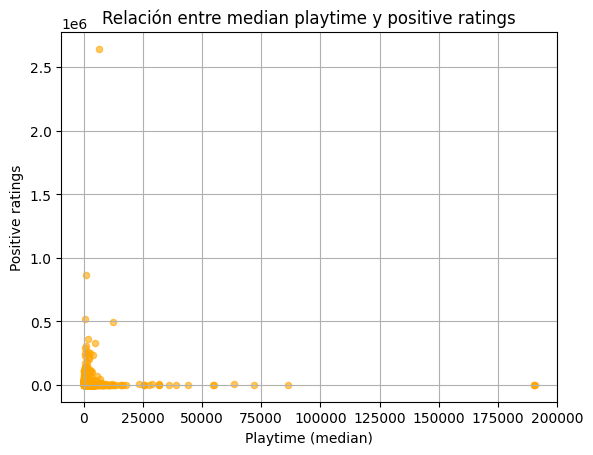

In [7]:

games.plot(kind='scatter', x='median_playtime', y='positive_ratings', color='orange', alpha=0.6)
plt.title('Relación entre median playtime y positive ratings')
plt.xlabel('Playtime (median)')
plt.ylabel('Positive ratings')
plt.grid(True)
plt.show()

In [8]:

fig = px.scatter(
    games,
    x='median_playtime',
    y='positive_ratings',
    title='Relación entre median playtime y positive ratings',
    opacity=0.6,
    color_discrete_sequence=['orange']
)

fig.update_layout(
    xaxis_title='Playtime (median)',
    yaxis_title='Positive ratings',
    template='simple_white'
)

fig.show()
